## 113 - Declarative Plotting Regions and Features


[Youtube](https://www.youtube.com/watch?v=G296GTGq3NQ)

In [1]:
from datetime import datetime

In [2]:
# Create variables for URL generation
image_date = datetime.utcnow().date()
region = 'CONUS'
channel = 8

In [3]:
# Construct the data_url string
data_url = ('https://thredds.ucar.edu/thredds/catalog/satellite/goes/east/products'
f'CloudAndMoistureImagery/{region}/Channel{channel:02d}/'
f'{image_date:%Y%m%d}/catalog.xml')

In [4]:
print(data_url)

https://thredds.ucar.edu/thredds/catalog/satellite/goes/east/productsCloudAndMoistureImagery/CONUS/Channel08/20221124/catalog.xml


In [5]:
from siphon.catalog import TDSCatalog

In [6]:
cat = TDSCatalog(data_url)
cat.datasets

['OR_ABI-L2-CMIPC-M6C08_G16_s20223280001170_e20223280001170_c20223280001170.nc', 'OR_ABI-L2-CMIPC-M6C08_G16_s20223280006170_e20223280006170_c20223280006170.nc', 'OR_ABI-L2-CMIPC-M6C08_G16_s20223280011170_e20223280011170_c20223280011170.nc', 'OR_ABI-L2-CMIPC-M6C08_G16_s20223280016170_e20223280016170_c20223280016170.nc', 'OR_ABI-L2-CMIPC-M6C08_G16_s20223280021170_e20223280021170_c20223280021170.nc', 'OR_ABI-L2-CMIPC-M6C08_G16_s20223280026170_e20223280026170_c20223280026170.nc', 'OR_ABI-L2-CMIPC-M6C08_G16_s20223280031170_e20223280031170_c20223280031170.nc', 'OR_ABI-L2-CMIPC-M6C08_G16_s20223280036170_e20223280036170_c20223280036170.nc', 'OR_ABI-L2-CMIPC-M6C08_G16_s20223280041170_e20223280041170_c20223280041170.nc', 'OR_ABI-L2-CMIPC-M6C08_G16_s20223280046170_e20223280046170_c20223280046170.nc', 'OR_ABI-L2-CMIPC-M6C08_G16_s20223280051170_e20223280051170_c20223280051170.nc', 'OR_ABI-L2-CMIPC-M6C08_G16_s20223280056170_e20223280056170_c20223280056170.nc', 'OR_ABI-L2-CMIPC-M6C08_G16_s20223280101

In [7]:
ds = cat.datasets[-1].remote_access(use_xarray = True)

In [8]:
import metpy.plots as mpplots

/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


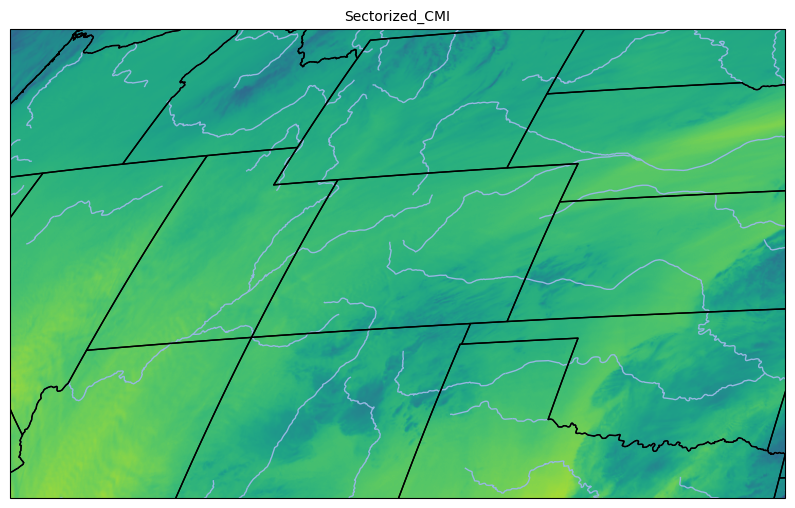

In [13]:
# Create the image plot
img = mpplots.ImagePlot()
img.data = ds
img.field = 'Sectorized_CMI'
img.colormap = 'viridis'

# Create the panel
panel = mpplots.MapPanel()
panel.plots = [img]
panel.layers = ['coastline', 'borders', 'rivers', 'states']
panel.area = 'co'

# Panel Container
pc = mpplots.PanelContainer()
pc.panels = [panel]
pc.size = (10, 8)

pc.show()